this jupyter notebook belongs to guilan university discrete math of 981 semester
author: ahmad mohammadalizadeh
+ <a href="mailto:ahmadsparof@gmail.com">Email me if there is any complexity or question</a>
and special tnx to <a href="https://github.com/juanklopper">Dr Juan H Klopper</a> for his nice jupyter notebook about probability

In [ ]:
import sympy as sym
# Importing additional sympy, scipy and math functions, as well as plotting functions
from sympy.stats import Coin, density, Die, P, DiscreteUniform, Binomial, Normal, E
from math import factorial
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context(font_scale = 2)
%matplotlib inline
sym.init_printing(use_latex = "mathjax")

# probability

Follow these links
- [Experiments](#Experiments)
- [Probability of an event](#Probability-of-an-event)
- [Conditional probability](#Conditional-probability)
- [The binomial distribution](#The-binomial-distribution)

## Experiments

In [3]:
# Defining a fair coin
C = Coin("C", p = 0.5)
C

C

In [4]:
# The density function of C expressed as a dict
density(C).dict

{H: 0.5, T: 0.5}

In [5]:
# Creating an unfair coin
uC = Coin("uC", p = 6/10)

In [6]:
density(uC).dict

{H: 0.6, T: 0.4}

### example

We can add mathematical notation to this discussion.  Consider the sample space of all the Cartesian point $ x $ and $ y $ that fall within a circle centered around the origin and with a radius of $ 3 $.  It would simply be $$ S = \left\{ \left( x,y \right) \quad | \quad {x}^{2} + {y}^{2} < {3}^{2} \right\} $$
An **Event** is a subset of a sample space.  For the experiment that relates to the catsing of a die, with the sample space being $  S = \left\{ 1,2,3,4,5,6 \right\} $, we can create an event that relates to all values greater than or equal to $ 4 $.  We might then write the event as $ {E}_{1} = \left\{ 4,5,6 \right\} $, with $ {E}_{1} \subset  S $.  A sample space is the an event containing all possible outcomes.
We can then have $ {E}_{1} \subseteq  S $ and $ {E}_{1} = \emptyset $.
Let's write a python™ function that casts a pair of dice and tells us how many ways there are that can make up the value which we pass as an argument.  The value that we pass as an argument results in an event.

In [7]:
def dice(x):
    number = 0
    for i in range(1, 7): # values 1, 2, 3, 4, 5, and 6 (7 is excluded)
        for j in range(1, 7):
            if i + j == x:
                number += 1
            else:
                number = number
    return number

In [8]:
# In how many ways can be roll a 7?
dice(7)

6

Here is a function that also shows us the actual values.

In [24]:
def dicepair(x):
    number = 0
    for i in range(1, 7):
        for j in range(1, 7):
            if i + j == x:
                number += 1
                print(i,j) # Printing the value pairs to the screen
            else:
                number = number
    return number
dicepair(7)

1 6
2 5
3 4
4 3
5 2
6 1


6

We can also ask for an event that is a complement.  So given our python™ function above we can ask for all the pairs that do not add to the argument value.

In [23]:
def dicepaircomplement(x):
    number = 0
    for i in range(1, 7):
        for j in range(1, 7):
            if i + j != x:
                number += 1
                print(i, j)
            else:
                number = number
    return number
dicepaircomplement(7)

1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 6
3 1
3 2
3 3
3 5
3 6
4 1
4 2
4 4
4 5
4 6
5 1
5 3
5 4
5 5
5 6
6 2
6 3
6 4
6 5
6 6


30

We can also consider the intersection of events.  Continuing with the dice experiment we can look at the intersection between the events *total (sum of two dice) larger than* $ 6 $ and *both values equal*.  The intersection of these two events would be $ \left\{ \left( 4,4 \right), \left( 5,5 \right), \left( 6,6 \right) \right\} $.

In [21]:
def dicepairequallarger(x):
    number = 0
    for i in range(1, 7):
        for j in range(1, 7):
            if i + j > x and i == j:
                number += 1
                print(i,j)
            else:
                number = number
    return number
dicepairequallarger(6)

4 4
5 5
6 6


3

Remember that some events are mutually exclusive and have an intersection which is $ \emptyset $.
If we have an intersection of events, we must have a union.  Let's create a python™ function that returns the pairs that are either larger than an argument value or both values are equal.

In [20]:
def dicepairunion(x):
    number = 0
    for i in range(1, 7):
        for j in range(1, 7):
            if i + j > x or i == j:
                number += 1
                print(i,j)
            else:
                number = number
    return number
dicepairunion(10)

1 1
2 2
3 3
4 4
5 5
5 6
6 5
6 6


8

As with set theory we have some rules for combining events.  If $ S $ is the sample space and $ A $ is a given event we have:
- $ A \cap \emptyset = \emptyset $
- $ A \cup \emptyset = A $
- $ A \cap A' = \emptyset $
- $ A \cup A' = S $
- $ S' = \emptyset $
- $ \emptyset ' = S $
- $ \left( A' \right) ' = A $
- $ \left( A \cap B \right) ' = A' \cup B' $
- $ \left( A \cup B \right) ' = A' \cap B' $

## Probability of an event

The **Probability** of an event or the likelihood of an event is the ratio between the cardinality of the event and the sample space (given that both are finite values) $$ {P}{\left( A \right)} = \frac{\left| A \right|}{\left| S \right|} $$
We can use the ```sympy.stats.Die``` function to look at probabilities.

In [26]:
# Create computer variable X
# It is a fair die with 6 sides
X = Die("X", 6)
P(X > 3)

1/2

We can also the the ```sympy.stats.DiscreteUniform``` distribution.  Below we create such a distribution with valsue from $ 1$ through $ 6 $ and then use the ```density``` function (with a ```dict``` method to list the possible outcomes and their likelihood).

In [27]:
X = DiscreteUniform("X", range(1, 7))
density(X).dict

{1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

The probability when summing all the events equals $ 1 $.  In the case of a die, the sample space has $ 6 $ elements.  They all have a probability of $ \frac{1}{6} $ of landing face-up when the die is cast.  Adding all the probabilities equals $ \frac{1}{6} + \frac{1}{6}  + \frac{1}{6}  + \frac{1}{6}  + \frac{1}{6}  + \frac{1}{6} = \frac{6}{6} = 1  $

In [28]:
P(X > 0)

1

A classical examples asks for the probability that, assuming a non-leap year, $ n $  persons in a room share a birthdate.  This examples shows us that it is sometimes easier to consider the complement of the event, i.e. probability of not sharing a birthday.<p/>
We shall start small and consider only a year that contains $ 3 $ days and with a room filled with $ 2 $ persons.  Either they share a birthday on one of these $ 3 $ days or they don't.  So the possible outcomes if we make pairs of $ 0 $ and $ 1 $ values for the *not birthday* and *birthday* values are
$$ \left[ \left( 1,1 \right) ,\left( 0,0 \right) ,\left( 0,0 \right)  \right] \\ \left[ \left( 1,0 \right) ,\left( 0,1 \right) ,\left( 0,0 \right)  \right] \\ \left[ \left( 1,0 \right) ,\left( 0,0 \right) ,\left( 0,1 \right)  \right] \\ \left[ \left( 0,1 \right) ,\left( 1,0 \right) ,\left( 0,0 \right)  \right] \\ \left[ \left( 0,0 \right) ,\left( 1,1 \right) ,\left( 0,0 \right)  \right] \\ \left[ \left( 0,0 \right) ,\left( 1,0 \right) ,\left( 0,1 \right)  \right] \\ \left[ \left( 0,1 \right) ,\left( 0,0 \right) ,\left( 1,0 \right)  \right] \\ \left[ \left( 0,0 \right) ,\left( 0,1 \right) ,\left( 1,0 \right)  \right] \\ \left[ \left( 0,0 \right) ,\left( 0,0 \right) ,\left( 1,1 \right)  \right] $$
There are $ 9 $ possible outcomes, which is calculated from the days and the number of persons as $ {3}^{2} $.  So for a year and $ n $ persons, we will have $ {365}^{n} $ possible outcomes.

Start with the first person.  We will make them all female, so that we can stick with *she*.  As for the first, then, she has $ 3 $ days to have a birthday on.  For the second, well she only has $ 3 - 1 = 2 $ days on which not to share a birthday.  So, for not sharing a birthday we have
$$ \frac{3 \times 2}{{3}^{2}} = \frac{6}{9} $$
If we look at the table above, there are indeed $ 6 $ out of the possible $ 9 $ outcomes where a birtday is not shared.  To calculate the probability of a shared birthday then, we simply subtract from $ 1 $, so the probability of the two sharing a birthday in this absurd year is
$$ 1 - \frac{3 \times 2}{{3}^{2}} = \frac{3}{9} $$
Ramping this up to $ n $ persons and $ 365 $ days we get
$$ 1 - \frac{365 \times 364 \times \dots \times \left( 365 - n + 1 \right)}{{365}^{n}} $$

## Conditional probability

Up until now, we have considered unconditional events.  If you flip two coins in a row, the ouctome of the second is not influenced by the first.  This is not so in **Conditional Probability** where an outcome is influenced by that which have preceded it.
We note the probability of $ A $ given $ B $ and write
$$ {P}{\left( A|B \right)} = \frac{{P}{\left( A \cap B \right)}}{{P}{\left( B \right)}} $$
So, imagine that we cast a pair of dice.  The equiprobable sample space consists of $ 36 $ ordered pairs, with the probability of any pair landing face-up being $ \frac{1}{36} $.<p/>
As a condtional probability question we can ask what the probability is of one of the dice landing with the value $ 2 $ face-up given that the total face-value is $ 6 $, i.e. $ {P}{\left( A|B \right)} $.
From our ```dicepair()``` function above, let's see how many ways there are to cast a total face-value of $ 6 $.

In [29]:
dicepair(6)

1 5
2 4
3 3
4 2
5 1


5

We have then that $ {P}{\left( B \right)} = \frac{5}{36} $.  For $ {P}{\left( A \cap B \right)} $, we never created a function to show how many times a certain number appears in the ordered pairs.  Here is one.

In [30]:
def nump(x):
    total = 0
    for i in range(1, 7):
        for j in range(1, 7):
            if i == x or j == x:
                print(i, j)
                total += 1
            else:
                total = total
    return total
nump(2)

1 2
2 1
2 2
2 3
2 4
2 5
2 6
3 2
4 2
5 2
6 2


11

We only count two pairs in the intersection, $ \left\{ \left( 2, 4 \right), \left( 4,2 \right) \right\} $, thus $ {P}{\left( A \cap B \right)} = \frac{2}{36} $.  Thus we have:
$$ {P}{\left( A|B \right)} = \frac{{P}{\left( A \cap B \right)}}{{P}{\left( B \right)}} \\ {P}{\left( A|B \right)} = \frac{\frac{2}{36}}{\frac{5}{36}} \\ {P}{\left( A|B \right)} = \frac{2}{5} $$
In another famous example we consider two siblings.  If we restrict the sample space (for simplicity) to boys, $ B $, and girls, $ G $, we have $ \left\{ \left( g,g \right), \left( g,b \right), \left( b,g \right), \left( b,b \right) \right\} $.  In the first instance we can ask what the probability is of both siblings being girls, given that at least one of the two is a girl.  This reduces our sample space to $ \left\{ \left( g,g \right), \left( g,b \right), \left( b,g \right) \right\} $ and the probability is a third.  If we want to know the probability of both being girls given that the first in the pair is a girl, we reduce the sample space even further to $ \left\{ \left( g,g \right), \left( g,b \right) \right\} $, giving a probability of a half.
From conditional probability (note the order change)
$$ {P}{\left( B|A \right)} = \frac{{P}{\left( A \cap B \right)}}{{P}{\left( A \right)}} $$
we get the **Multiplication Theorem of Conditional Probability**, which states
$$ {P}{\left( A \cap B \right)} = {P}{\left( A \right)}{P}{\left( B|A \right)} $$
We can extend this to more intersections.  Imagine we have $ 15 $ items, of which $ 6 $ are defective.  We draw 4 items at random and ask what the probability is of all $ 4 $ being fully functional.<p/>
The first item drawn has a probability of $ \frac{9}{15} $ of being fully functional.  We have now removed on functional unit from the list, so we are left with $ 14 $ items, of which $ 8 $ are functional.  So the probability of the second being functional is $ \frac{8}{14} $.  This repeats for all $ 4 $ draws and since we are looking for the probability of the intersection we have
$$ \frac{9}{15} \cdot \frac{8}{14} \cdot \frac{7}{13} \cdot \frac{6}{12} \approx 0.09  $$
So we have
$$ P\left( A\cap B \right) =P\left( A \right) P\left( B|A \right) \\ P\left( A\cap B\cap C \right) =P\left( A\cap B \right) P\left( C|A\cap B \right) \\ P\left( A\cap B\cap C \right) =P\left( A \right) P\left( B|A \right) P\left( C|A\cap B \right)  $$
For even more intersection we have
$$ P\left( { A }_{ 1 }\cap { A }_{ 2 }\cap \dots \cap { A }_{ k } \right) =P\left( { A }_{ 1 } \right) P\left( { A }_{ 2 }|{ A }_{ 1 } \right) P\left( { A }_{ 3 }|{ A }_{ 1 }\cap { A }_{ 2 } \right) \dots P\left( { A }_{ k }|{ A }_{ 1 }\cap { A }_{ 2 }\cap \dots \cap { A }_{ k-1 } \right)  $$
If all the events are independent (see next section), this simplifies to
$$ P\left( { A }_{ 1 }\cap { A }_{ 2 }\cap \dots \cap { A }_{ k } \right) =P\left( { A }_{ 1 } \right) P\left( { A }_{ 2 } \right) \dots P\left( { A }_{ k } \right)  $$

## The binomial distribution

Here we are concerned with the probability of an outcome (usually called a **success**) given $ n $ repeats of a binary outcome experiment, with the probability of a success being $ p $.  In an example we can flip a coint $ 10 $ times.  If *heads* is a success with a probability of $ p = 0.5 $ we can ask what the probability is of $ r \in \left[ 1,n \right] $ successes in $ n $ trials, given $ p $.

In [32]:
# Creating a binomial distribution
# Experiment to be repeated 20 times
# At each independent trial we have the probability of success of 50%
X = Binomial("X", n = 6, p = 0.5)
density(X).dict

{0: 0.015625, 1: 0.09375, 2: 0.234375, 3: 0.3125, 4: 0.234375, 5: 0.09375, 6: 
0.015625}

So, above we have a dictionary with a *key* and a *value*.  Its states that there is a $ {0.015625} $ of getting no successes.  So if we flipped a coin $ 6 $ times, the proabbility of no *heads* would be approximately $ 0.015625 $.  For $ 2 $ heads it would be $ 0.234375 $.
The equation for $ r $ successes in $ n $ independent trials, given the probability of a success being $ p $ is
$$ { _{ n }{ C }_{ r } }{ p }^{ r }{ p }^{ n-r }=\frac { n! }{ r!\left( n-r \right) ! } { p }^{ r }{ p }^{ n-r } $$
We can create a python™ function that takes three arguments and calculates the equation above.

In [33]:
def succ(n,r,p):
    return ((factorial(n)) / ((factorial(r)) * (factorial(n - r)))) * (p**r) * (p**(n - r))
succ(6,2,0.5)

0.234375

We can recreate the same functionality as with the ```Binomial()``` *sympy* function.

In [34]:
def succ(n,p):
    for i in range(1, (n + 1)):
        print(i, ((factorial(n)) / ((factorial(i)) * (factorial(n - i)))) * (p**i) * (p**(n - i)), "\n")
succ(6, 0.5)

1 0.09375 

2 0.234375 

3 0.3125 

4 0.234375 

5 0.09375 

6 0.015625 



We can have some fun with this.  The *scipy* library has a statistics section that contains a large variety of random variable distributions.  One of them is ```binom()```.  One of the methdos of ```binom()``` is ```rvs()```.  When used together we can pass some arguments.  Below, I create the computer variable called ```sample1```.  It uses the binomial distribution and, as above, we do an experiment $ 6 $ times and look for the number of successes (from $ 0 $ successes up to $ 6 $ successes), with ethe probability of a success being $ 0.5 $ and quite independent of what came before.  The ```rvs()``` methods allows use to use the ```size``` arguments that, in effect, tells the computer to do this $ 1000 $ times.  You can do any number of repeats.  I simply chose $ 1000 $.<p/>
Then I use *seaborn* to give me a plot showing a histogram of the results.  As predicted, we will see $ 3 $ successes come up most often.

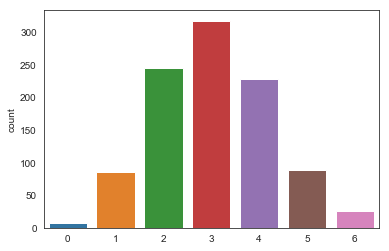

In [35]:
sample1 = binom.rvs(6, 0.5, size = 1000);
sns.countplot(sample1);